## Projeto - Séries Temporais

#### Preço por saca de 60kg líquido

Nota: Reais por saca de 60 kg líquido, bica corrida, tipo 6, bebida dura para melhor, valor descontado o Prazo de Pagamento pela taxa CDI, posto na cidade de São Paulo.

https://www.cepea.esalq.usp.br/br/indicador/cafe.aspx

In [1]:
# Manipulação dos Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings("ignore")

C:\Users\thari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\thari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Importando Modulos

In [2]:
# Funcoes
from Modulos.FUNCAO_Limpa_Dados import limpando_dados
from Modulos.FUNCAO_Media_Movel import calculo_media_movel
from Modulos.FUNCAO_Corrigindo_Inflacao import corrigindo_inflacao
from Modulos.FUNCAO_Avaliando_Modelos import AvaliandoModelos
from Modulos.FUNCAO_Retomando_Valores_Previsao import retomando_valor_previsto

# Classes
from Modulos.CLASSE_Teste_Dickey_Fuller import DickeyFuller
from Modulos.CLASSE_Acumulando_Inflacao_Diaria import AcumulandoInflacaoDiaria
from Modulos.CLASSE_Plot_Erro import PlotResiduos

In [3]:
df = pd.read_excel('serie_preco_cafe.xls')

In [4]:
# Aplica função que limpa os dados
df = limpando_dados(df)

In [5]:
df.head(4)

,preco_reais
data,
2016-01-04,496.87
2016-01-05,504.26
2016-01-06,497.49
2016-01-07,496.31


### Iniciando investigação dos dados

#### Plot inicial

Preço apresenta tendência de queda do início até o meio do ano. Essa tendência se reverte e apresenta alta até o fim do ano. Movimento pode ter relação com o momento da colheita. Como explicado abaixo, conforme o ano vai se afastando dos meses de colheita pode existir um aumento de preços.

#### Características da colheita

A colheita de café deve ser feita com os frutos em maturação fisiológica, parecidos com cerejas. Esse estado ocorre entre março e abril até setembro, no período da seca. Nesse momento, a cor da casca do café fica entre o vermelho e o amarelo, e os grãos precisam ter entre 55% e 70% de umidade.

O tempo de colheita após a floração do café é de aproximadamente 7 meses. Há mais de uma floração por ano. Por isso, a colheita se estende por vários meses. No Brasil, o pico de colheita acontece entre junho e agosto.

Diversos fatores interferem na qualidade dos grãos colhidos. Por exemplo, o manejo da lavoura, clima, momento de colheita, beneficiamento, secagem e armazenamento.

Fonte: https://blog.aegro.com.br/colheita-de-cafe

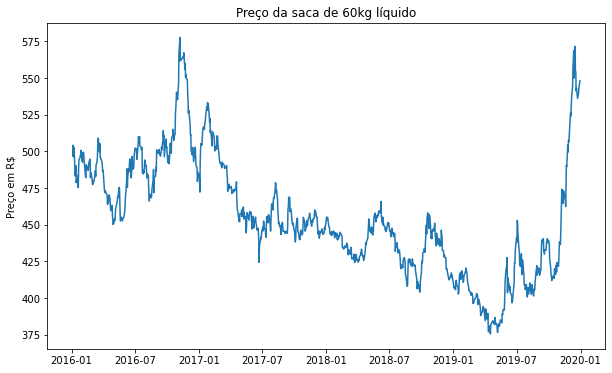

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(df['preco_reais'])
plt.title('Preço da saca de 60kg líquido')
plt.ylabel('Preço em R$')
plt.show();

### Médias móveis

#### Media Movel de 5 dias

In [7]:
media_movel_5dias = calculo_media_movel(df, 'preco_reais', 5)

In [8]:
media_movel_5dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-01-08,502.60,499.51,484.90,514.12
2016-01-11,483.32,496.80,482.19,511.41
2016-01-12,483.77,492.70,478.09,507.31
2016-01-13,490.33,491.27,476.66,505.88


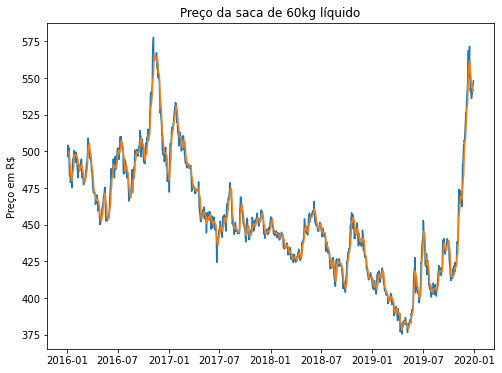

In [9]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_5dias['media_movel'])
plt.title('Preço da saca de 60kg líquido')
plt.ylabel('Preço em R$')
plt.show();

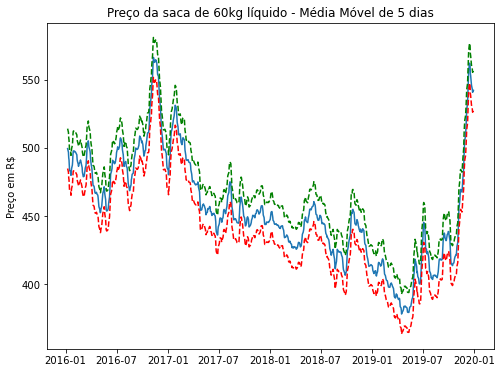

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(media_movel_5dias['media_movel'])
plt.plot(media_movel_5dias['mm_limite_abaixo'], 'r--')
plt.plot(media_movel_5dias['mm_limite_acima'], 'g--')
plt.title('Preço da saca de 60kg líquido - Média Móvel de 5 dias')
plt.ylabel('Preço em R$')
plt.show();

#### Media Movel de 30 dias

In [11]:
media_movel_30dias = calculo_media_movel(df, 'preco_reais', 30)

In [12]:
media_movel_30dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-02-16,489.23,491.46,445.96,536.96
2016-02-17,487.04,491.13,445.63,536.63
2016-02-18,487.77,490.58,445.08,536.08
2016-02-19,491.55,490.39,444.89,535.89


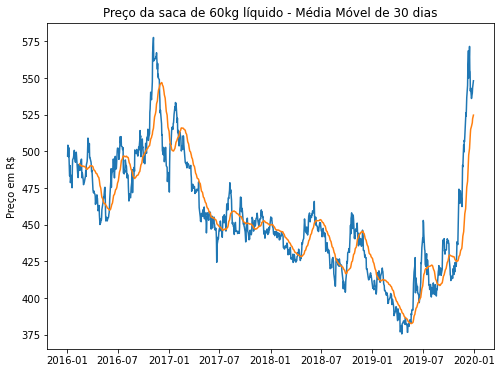

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_30dias['media_movel'])
plt.title('Preço da saca de 60kg líquido - Média Móvel de 30 dias')
plt.ylabel('Preço em R$')
plt.show();

#### Media Móvel de 90 dias

In [14]:
media_movel_90dias = calculo_media_movel(df, 'preco_reais', 90)

In [15]:
media_movel_90dias.head(4)

,preco_reais,media_movel,mm_limite_abaixo,mm_limite_acima
data,,,,
2016-05-12,469.06,482.33,415.06,549.60
2016-05-13,468.37,482.02,414.75,549.29
2016-05-16,475.14,481.69,414.42,548.96
2016-05-17,475.54,481.45,414.18,548.72


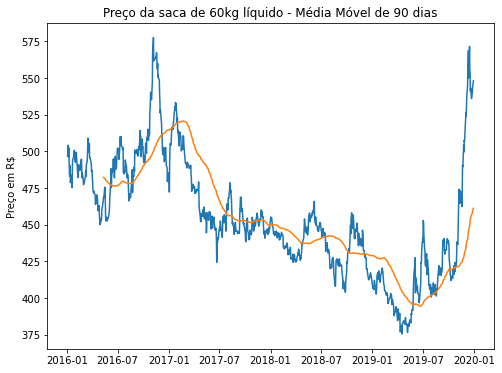

In [16]:
plt.figure(figsize = (8, 6))
plt.plot(df['preco_reais'])
plt.plot(media_movel_90dias['media_movel'])
plt.title('Preço da saca de 60kg líquido - Média Móvel de 90 dias')
plt.ylabel('Preço em R$')
plt.show();

### Dividindo entre dados de treino e teste

75% dos dados serão destinados a treino. 748 observações

25% dos dados serão testados. 249 observações

In [17]:
treino = df.iloc[:749, :]
teste = df.iloc[749:, :]

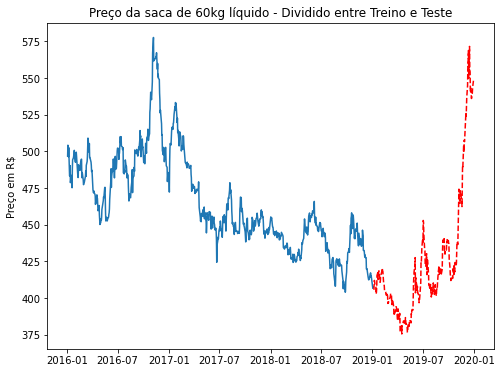

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(treino['preco_reais'])
plt.plot(teste['preco_reais'], 'r--')
plt.title('Preço da saca de 60kg líquido - Dividido entre Treino e Teste')
plt.ylabel('Preço em R$')
plt.show();

### Estacionariedade

#### Avaliando Sazonalidade e Tendência

In [19]:
sazonalidade_trend = seasonal_decompose(treino['preco_reais'], freq = 26)

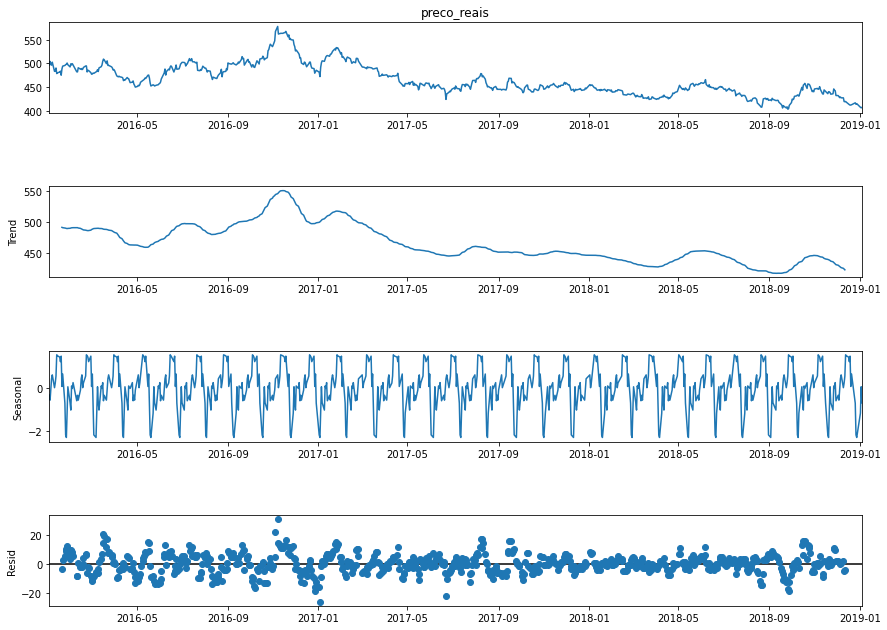

In [20]:
sazo_graph = sazonalidade_trend.plot()
sazo_graph.set_size_inches(14, 10);

#### Testes de Estacionariedade (Dickey-Fuller)

In [21]:
Teste_DF = DickeyFuller(treino['preco_reais'])

In [22]:
Teste_DF.resultados_teste()

Resultados do teste de Dickey-Fuller!
----------------------------------------------------------------------
Valor Dickey-Fuller: -1.7257
p-valor: 0.4179
Lags: 0
Observações: 748
----------------------------------------------------------------------
O valor crítico para um nível de significância de 1% é: -3.4391
O valor crítico para um nível de significância de 5% é: -2.8654
O valor crítico para um nível de significância de 10% é: -2.5688


'Falhamos em rejeitar a hipótese nula! Sem evidência de estacionariedade!'

#### Tornando a série estacionária

Vamos diferenciar a série em um período. Esse é um processo famoso por conseguir tornar uma serié estacionária.

Podemos tentar corrigir pela inflação também.

In [23]:
treino_diferenciado = treino.diff().dropna()
teste_diferenciado = teste.diff().dropna()

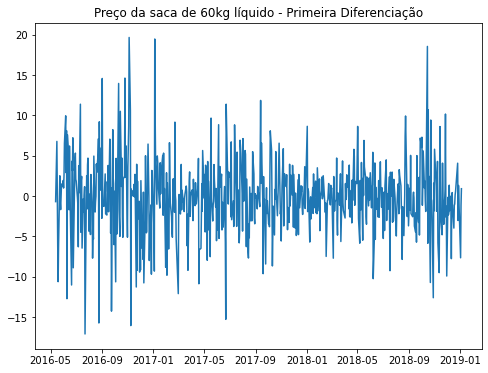

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(treino_diferenciado['preco_reais'])
plt.title('Preço da saca de 60kg líquido - Primeira Diferenciação')
plt.ylabel('')
plt.show();

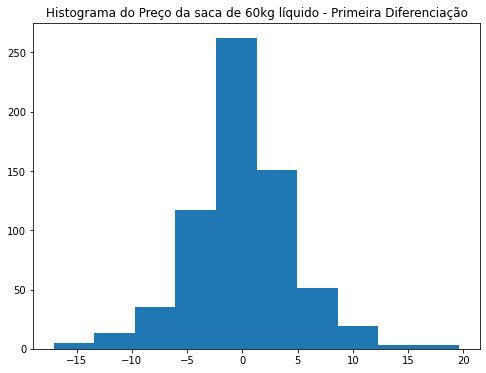

In [25]:
plt.figure(figsize = (8, 6))
plt.hist(treino_diferenciado['preco_reais'])
plt.title('Histograma do Preço da saca de 60kg líquido - Primeira Diferenciação')
plt.ylabel('')
plt.show();

#### Aplicando teste de dickey-fuller na serie diferenciada

In [26]:
Teste_DF_diff = DickeyFuller(treino_diferenciado['preco_reais'])

In [27]:
Teste_DF_diff.resultados_teste()

Resultados do teste de Dickey-Fuller!
----------------------------------------------------------------------
Valor Dickey-Fuller: -25.888
p-valor: 0.0
Lags: 0
Observações: 658
----------------------------------------------------------------------
O valor crítico para um nível de significância de 1% é: -3.4403
O valor crítico para um nível de significância de 5% é: -2.8659
O valor crítico para um nível de significância de 10% é: -2.5691


'Rejeitamos a hipótese nula! Evidência de estacionariedade!'

#### Verificando estacionariedade através do ajuste pela inflação

In [28]:
Inflacao_Diaria = AcumulandoInflacaoDiaria(indice = 'ipca', numero_serie = 433, inicio = '2016-01-01', fim = '2019-12-31')

In [29]:
df_inflacao_diaria = Inflacao_Diaria.convertendo_inflacao_mensal_para_diaria()

In [30]:
df_inflacao_diaria.head(4)

,Data,Taxa_Diaria
0,2016-01,0.000407
1,2016-02,0.000320
2,2016-03,0.000138
3,2016-04,0.000203


In [31]:
treino = corrigindo_inflacao(treino, df_inflacao_diaria)

In [32]:
treino.head(6)

,preco_reais,preco_corrigido
data,,
2016-01-04,496.87,455.82
2016-01-05,504.26,462.79
2016-01-06,497.49,456.76
2016-01-07,496.31,455.86
2016-01-08,502.60,461.83
2016-01-11,483.32,444.29


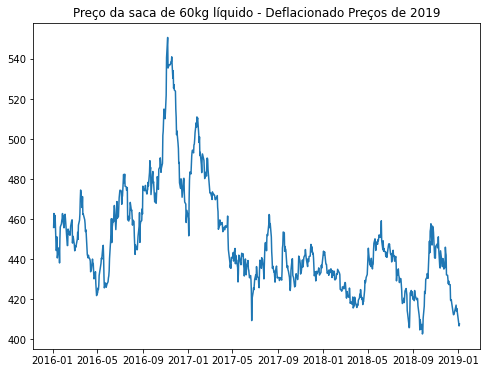

In [33]:
plt.figure(figsize = (8, 6))
plt.plot(treino['preco_corrigido'])
plt.title('Preço da saca de 60kg líquido - Deflacionado Preços de 2019')
plt.ylabel('')
plt.show();

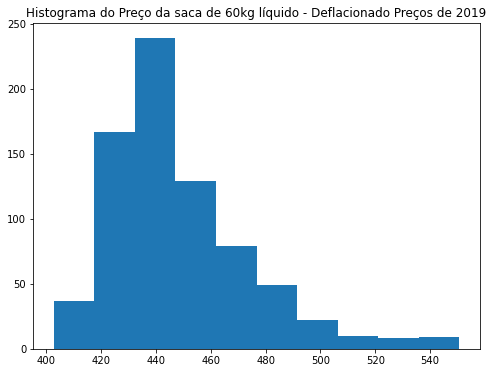

In [34]:
plt.figure(figsize = (8, 6))
plt.hist(treino['preco_corrigido'])
plt.title('Histograma do Preço da saca de 60kg líquido - Deflacionado Preços de 2019')
plt.ylabel('')
plt.show();

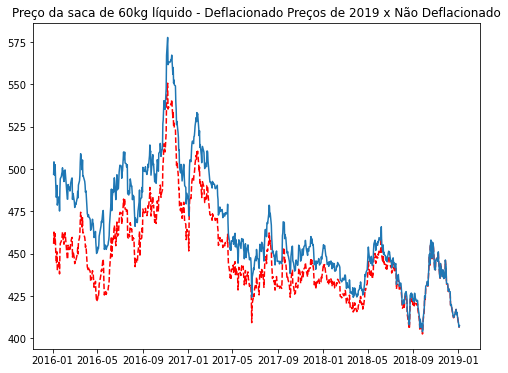

In [35]:
plt.figure(figsize = (8, 6))
plt.plot(treino['preco_corrigido'], 'r--')
plt.plot(treino['preco_reais'])
plt.title('Preço da saca de 60kg líquido - Deflacionado Preços de 2019 x Não Deflacionado')
plt.ylabel('')
plt.show();

In [36]:
Teste_DF_inflacao = DickeyFuller(treino['preco_corrigido'])
Teste_DF_inflacao.resultados_teste()

Resultados do teste de Dickey-Fuller!
----------------------------------------------------------------------
Valor Dickey-Fuller: -2.1752
p-valor: 0.2154
Lags: 0
Observações: 748
----------------------------------------------------------------------
O valor crítico para um nível de significância de 1% é: -3.4391
O valor crítico para um nível de significância de 5% é: -2.8654
O valor crítico para um nível de significância de 10% é: -2.5688


'Falhamos em rejeitar a hipótese nula! Sem evidência de estacionariedade!'

### Autocorrelação

#### Avaliando a autocorrelação nas séries não estacionárias e estacionárias

#### Série Não Estacionária

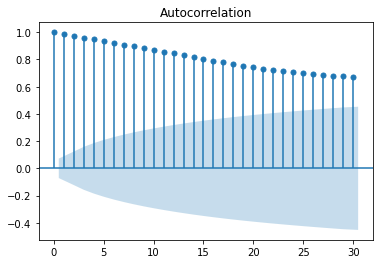

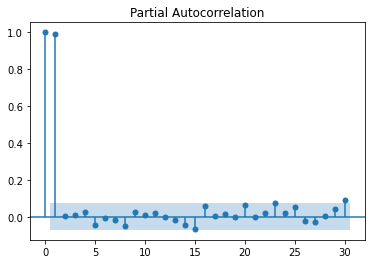

In [37]:
plot_acf(treino['preco_reais'], lags = 30);
plot_pacf(treino['preco_reais'], lags = 30);

#### Série Estacionária

Temos evidência de lags autocorrelacionados de primeira ordem. Além disso no 30º lag temos correlação negativa.

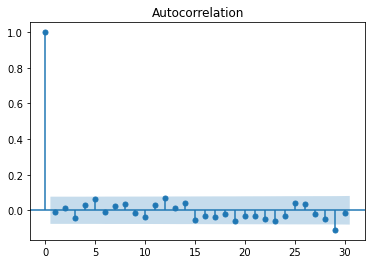

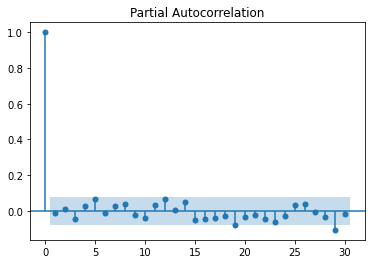

In [38]:
plot_acf(treino_diferenciado['preco_reais'], lags = 30);
plot_pacf(treino_diferenciado['preco_reais'], lags = 30);

### Previsões

#### Modelo 1 - Previsão com base no último valor (Shift)

#### Avaliando em Treino

In [39]:
modeloV1_shift_treino = treino_diferenciado[['preco_reais']]
modeloV1_shift_treino.columns = ['Observado']
modeloV1_shift_treino['Previsto'] = modeloV1_shift_treino.shift()
modeloV1_shift_treino.dropna(inplace = True)

In [40]:
modeloV1_avalia_treino = retomando_valor_previsto(treino['preco_reais'], modeloV1_shift_treino['Previsto'])

avaliacao_treino = AvaliandoModelos(modeloV1_avalia_treino['Preco_Original'],
                                    modeloV1_avalia_treino['Preco_Previsto'],
                                    nome_col = 'ModeloV1_Shift', nome_indice = 'Treino')

In [41]:
avaliacao_treino

,ModeloV1_Shift
Treino,
MSE,21.584788
RMSE,4.645943
MAE,3.384043
MAPE,0.718484


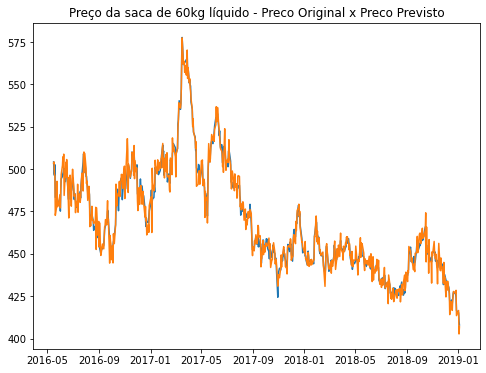

In [42]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV1_avalia_treino['Preco_Original'])
plt.plot(modeloV1_avalia_treino['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

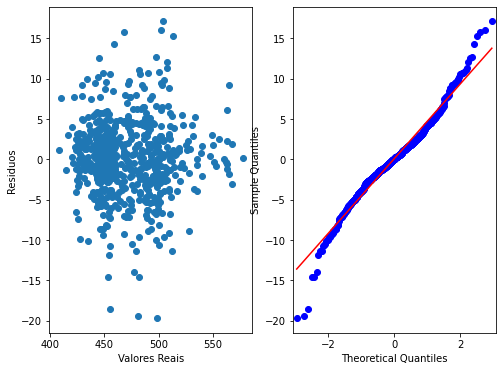

In [43]:
residuosV1_treino = PlotResiduos(modeloV1_avalia_treino)
residuosV1_treino.plot_residuos()

#### Avaliando em Teste

In [44]:
modeloV1_shift_teste = teste_diferenciado[['preco_reais']]
modeloV1_shift_teste.columns = ['Observado']

hist = [modeloV1_shift_treino.iloc[i, 0] for i in range(len(modeloV1_shift_treino))]
lista_previsao = []

for t in range(len(modeloV1_shift_teste)):
    yhat = hist[-1]
    obs = modeloV1_shift_teste.iloc[t, 0]
    lista_previsao.append(yhat)
    hist.append(obs)

modeloV1_shift_teste['Previsto'] = lista_previsao

In [45]:
modeloV1_avalia_teste = retomando_valor_previsto(teste['preco_reais'], modeloV1_shift_teste['Previsto'])

avaliacao_teste = AvaliandoModelos(modeloV1_avalia_teste['Preco_Original'],
                                   modeloV1_avalia_teste['Preco_Previsto'],
                                   nome_col = 'ModeloV1_Shift', nome_indice = 'Teste')

In [46]:
avaliacao_teste

,ModeloV1_Shift
Teste,
MSE,31.433443
RMSE,5.606554
MAE,3.940769
MAPE,0.901161


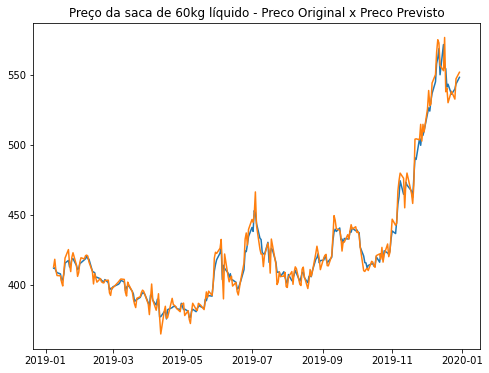

In [47]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV1_avalia_teste['Preco_Original'])
plt.plot(modeloV1_avalia_teste['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

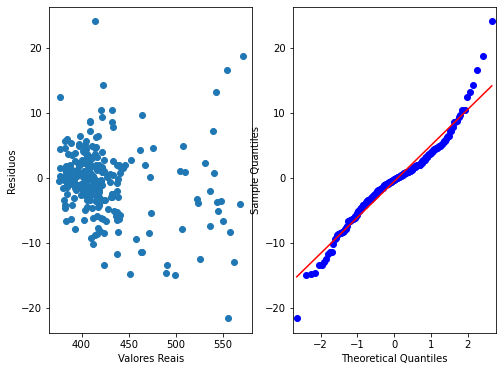

In [48]:
residuosV1_teste = PlotResiduos(modeloV1_avalia_teste)
residuosV1_teste.plot_residuos()

#### Modelo 2 - Média Móvel de 5 dias

#### Avaliando em Treino

In [49]:
modeloV2_MM_treino = treino_diferenciado[['preco_reais']]
modeloV2_MM_treino.columns = ['Observado']
modeloV2_MM_treino['Previsto'] = modeloV2_MM_treino.rolling(5).mean()
modeloV2_MM_treino.dropna(inplace = True)

In [50]:
modeloV2_avalia_treino = retomando_valor_previsto(treino['preco_reais'], modeloV2_MM_treino['Previsto'])

avaliacao_treino['ModeloV2_MM_5Dias'] = AvaliandoModelos(modeloV2_avalia_treino['Preco_Original'],
                                                         modeloV2_avalia_treino['Preco_Previsto'])

In [51]:
avaliacao_treino

,ModeloV1_Shift,ModeloV2_MM_5Dias
Treino,,
MSE,21.584788,4.202348
RMSE,4.645943,2.049963
MAE,3.384043,1.581344
MAPE,0.718484,0.335163


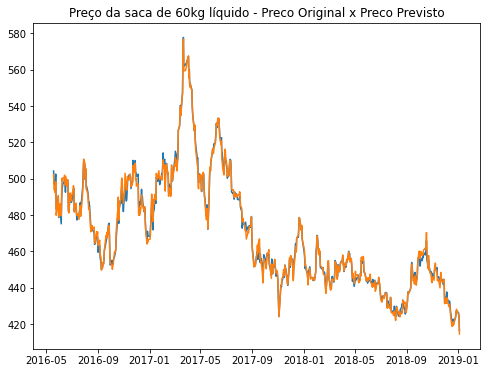

In [52]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV2_avalia_treino['Preco_Original'])
plt.plot(modeloV2_avalia_treino['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

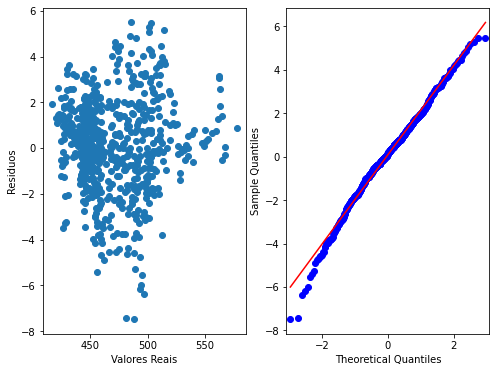

In [53]:
residuosV2_treino = PlotResiduos(modeloV2_avalia_treino)
residuosV2_treino.plot_residuos()

#### Avaliando em Teste

In [54]:
modeloV2_MM_teste = teste_diferenciado[['preco_reais']]
modeloV2_MM_teste.columns = ['Observado']

hist = [modeloV2_MM_treino.iloc[i, 0] for i in range(len(modeloV2_MM_treino))]
lista_previsao = []

for t in range(len(modeloV2_MM_teste)):
    yhat = np.mean(hist[-5:])
    obs = modeloV2_MM_teste.iloc[t, 0]
    lista_previsao.append(yhat)
    hist.append(obs)

modeloV2_MM_teste['Previsto'] = lista_previsao

In [55]:
modeloV2_avalia_teste = retomando_valor_previsto(teste['preco_reais'], modeloV2_MM_teste['Previsto'])

avaliacao_teste['ModeloV2_MM_5Dias'] = AvaliandoModelos(modeloV2_avalia_teste['Preco_Original'],
                                                        modeloV2_avalia_teste['Preco_Previsto'])

In [56]:
avaliacao_teste

,ModeloV1_Shift,ModeloV2_MM_5Dias
Teste,,
MSE,31.433443,7.453015
RMSE,5.606554,2.730021
MAE,3.940769,1.995142
MAPE,0.901161,0.451930


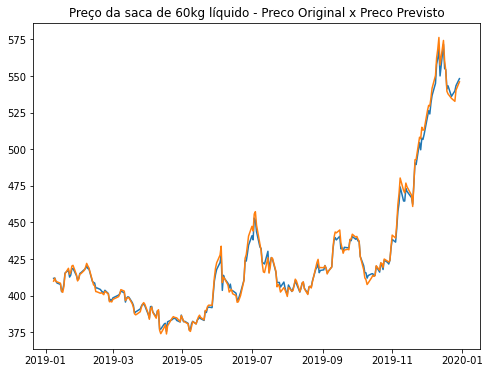

In [57]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV2_avalia_teste['Preco_Original'])
plt.plot(modeloV2_avalia_teste['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

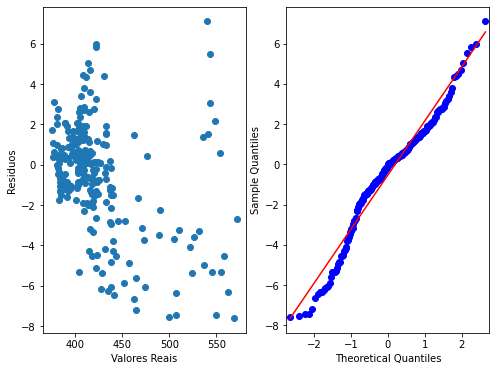

In [58]:
residuosV2_teste = PlotResiduos(modeloV2_avalia_teste)
residuosV2_teste.plot_residuos()

#### Modelo 3 - Média Móvel Exponencial

#### Avaliando em treino

In [59]:
modeloV3_MME_treino = treino_diferenciado[['preco_reais']]
modeloV3_MME_treino.columns = ['Observado']

alpha = 0.5
modelo_v3 = ExponentialSmoothing(modeloV3_MME_treino['Observado']).fit(smoothing_level = alpha)
modeloV3_MME_treino['Previsto'] = modelo_v3.predict(start = 0, end = len(modeloV3_MME_treino) - 1)

In [60]:
modeloV3_avalia_treino = retomando_valor_previsto(treino['preco_reais'], modeloV3_MME_treino['Previsto'])

avaliacao_treino['ModeloV3_MME'] = AvaliandoModelos(modeloV3_avalia_treino['Preco_Original'],
                                                    modeloV3_avalia_treino['Preco_Previsto'])

In [61]:
avaliacao_treino

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME
Treino,,,
MSE,21.584788,4.202348,7.124139
RMSE,4.645943,2.049963,2.669108
MAE,3.384043,1.581344,1.971548
MAPE,0.718484,0.335163,0.418330


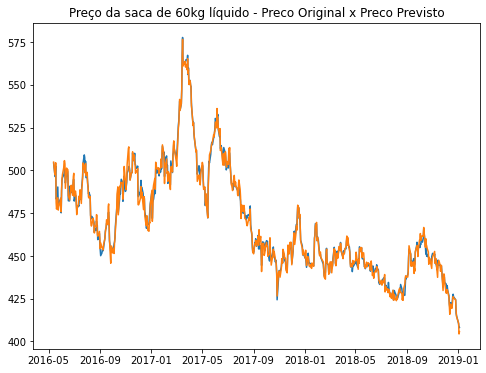

In [62]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV3_avalia_treino['Preco_Original'])
plt.plot(modeloV3_avalia_treino['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

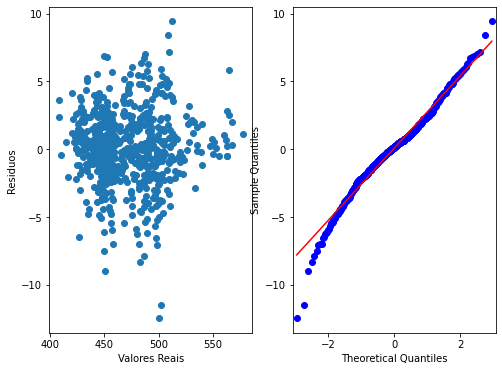

In [63]:
residuosV3_treino = PlotResiduos(modeloV3_avalia_treino)
residuosV3_treino.plot_residuos()

#### Avaliando em teste

In [64]:
modeloV3_MME_teste = teste_diferenciado[['preco_reais']]
modeloV3_MME_teste.columns = ['Observado']

hist = [modeloV3_MME_treino.iloc[i, 0] for i in range(len(modeloV3_MME_treino))]
hist_prev = [modeloV3_MME_treino.iloc[i, 1] for i in range(len(modeloV3_MME_treino))]
lista_previsao = []

for t in range(len(modeloV3_MME_teste)):
    yhat = hist_prev[-1] + (alpha * (hist[-1] - hist_prev[-1]))
    obs = modeloV3_MME_teste.iloc[t, 0]
    lista_previsao.append(yhat)
    hist.append(obs)
    hist_prev.append(yhat)

modeloV3_MME_teste['Previsto'] = lista_previsao

In [65]:
modeloV3_avalia_teste = retomando_valor_previsto(teste['preco_reais'], modeloV3_MME_teste['Previsto'])

avaliacao_teste['ModeloV3_MME'] = AvaliandoModelos(modeloV3_avalia_teste['Preco_Original'],
                                                        modeloV3_avalia_teste['Preco_Previsto'])

In [66]:
avaliacao_teste

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME
Teste,,,
MSE,31.433443,7.453015,10.968012
RMSE,5.606554,2.730021,3.311799
MAE,3.940769,1.995142,2.430040
MAPE,0.901161,0.451930,0.553935


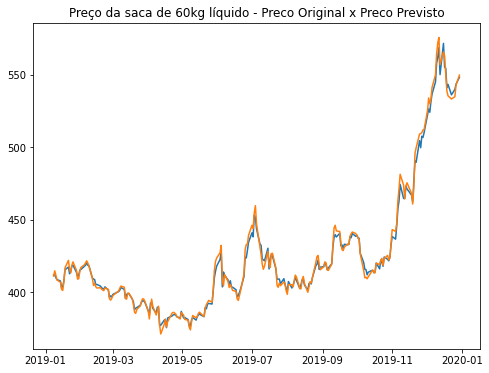

In [67]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV3_avalia_teste['Preco_Original'])
plt.plot(modeloV3_avalia_teste['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

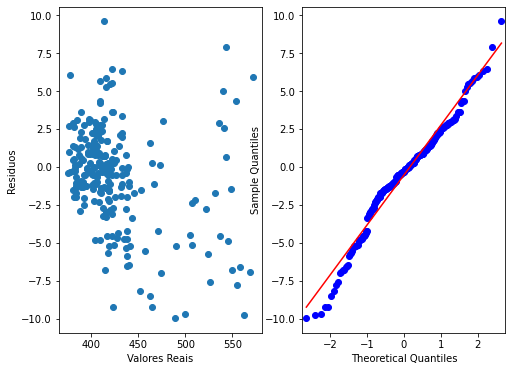

In [68]:
residuosV3_teste = PlotResiduos(modeloV3_avalia_teste)
residuosV3_teste.plot_residuos()

#### Modelo 4 - AR(1)

#### Avaliando em treino

In [69]:
modeloV4_AR1_treino = treino_diferenciado[['preco_reais']]
modeloV4_AR1_treino.columns = ['Observado']

modelo_v4 = ARMA(modeloV4_AR1_treino['Observado'], order = [1, 0]).fit()
modeloV4_AR1_treino['Previsto'] = modelo_v4.predict(start = 0, end = len(modeloV4_AR1_treino) - 1)

In [70]:
modeloV4_avalia_treino = retomando_valor_previsto(treino['preco_reais'], modeloV4_AR1_treino['Previsto'])

avaliacao_treino['ModeloV4_AR1'] = AvaliandoModelos(modeloV4_avalia_treino['Preco_Original'],
                                                    modeloV4_avalia_treino['Preco_Previsto'])

In [71]:
avaliacao_treino

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME,ModeloV4_AR1
Treino,,,,
MSE,21.584788,4.202348,7.124139,0.011185
RMSE,4.645943,2.049963,2.669108,0.105760
MAE,3.384043,1.581344,1.971548,0.095524
MAPE,0.718484,0.335163,0.418330,0.020391


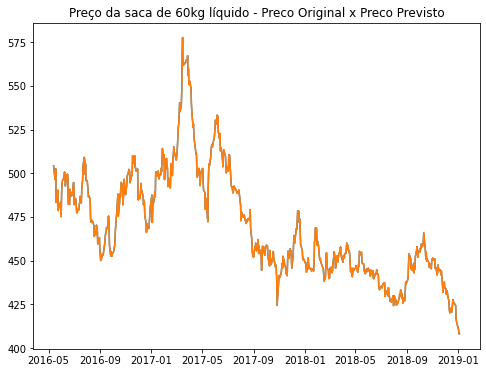

In [72]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV4_avalia_treino['Preco_Original'])
plt.plot(modeloV4_avalia_treino['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

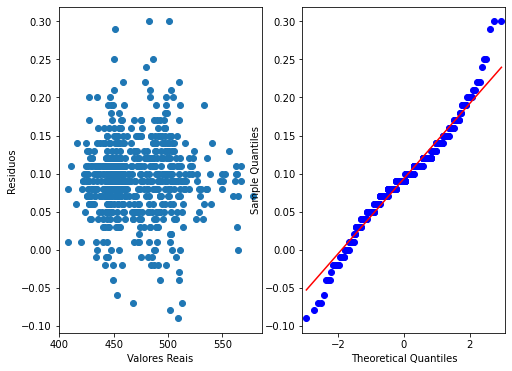

In [73]:
residuosV4_treino = PlotResiduos(modeloV4_avalia_treino)
residuosV4_treino.plot_residuos()

#### Avaliando em teste

In [74]:
modeloV4_AR1_teste = teste_diferenciado[['preco_reais']]
modeloV4_AR1_teste.columns = ['Observado']

coef_l1 = modelo_v4.arparams.item()
hist = [modeloV4_AR1_treino.iloc[i, 0] for i in range(len(modeloV4_AR1_treino))]
lista_previsao = []

for t in range(len(modeloV4_AR1_teste)):
    yhat = (hist[-1] * coef_l1)
    obs = modeloV4_AR1_teste.iloc[t, 0]
    lista_previsao.append(yhat)
    hist.append(obs)

modeloV4_AR1_teste['Previsto'] = lista_previsao

In [75]:
modeloV4_avalia_teste = retomando_valor_previsto(teste['preco_reais'], modeloV4_AR1_teste['Previsto'])

avaliacao_teste['ModeloV4_AR1'] = AvaliandoModelos(modeloV4_avalia_teste['Preco_Original'],
                                                   modeloV4_avalia_teste['Preco_Previsto'])

In [76]:
avaliacao_teste

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME,ModeloV4_AR1
Teste,,,,
MSE,31.433443,7.453015,10.968012,0.003577
RMSE,5.606554,2.730021,3.311799,0.059807
MAE,3.940769,1.995142,2.430040,0.041984
MAPE,0.901161,0.451930,0.553935,0.009599


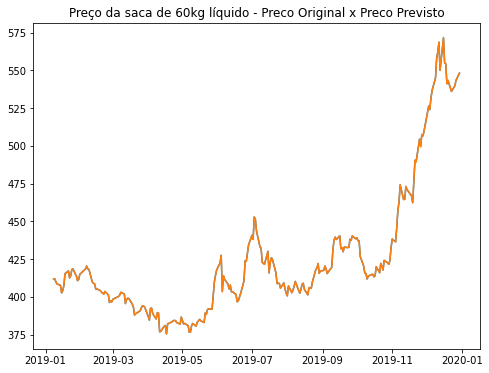

In [77]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV4_avalia_teste['Preco_Original'])
plt.plot(modeloV4_avalia_teste['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

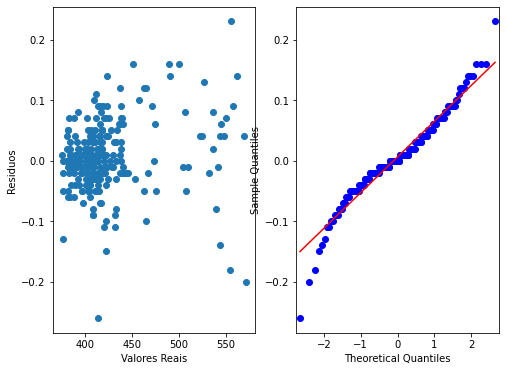

In [78]:
residuosV4_teste = PlotResiduos(modeloV4_avalia_teste)
residuosV4_teste.plot_residuos()

#### Modelo 5 - ARMA (1, 1)

#### Avaliando em treino

In [79]:
from statsmodels.tsa.arima.model import ARIMA
modeloV5_ARMA_treino = treino_diferenciado[['preco_reais']]
modeloV5_ARMA_treino.columns = ['Observado']

modelo_v5 = ARIMA(modeloV5_ARMA_treino['Observado'], order = (1, 0, 1)).fit()
modeloV5_ARMA_treino['Previsto'] = modelo_v5.predict(start = 0, end = len(modeloV5_ARMA_treino) - 1)

In [80]:
modeloV5_avalia_treino = retomando_valor_previsto(treino['preco_reais'], modeloV5_ARMA_treino['Previsto'])

avaliacao_treino['ModeloV5_ARMA11'] = AvaliandoModelos(modeloV5_avalia_treino['Preco_Original'],
                                                    modeloV5_avalia_treino['Preco_Previsto'])

In [81]:
avaliacao_treino

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME,ModeloV4_AR1,ModeloV5_ARMA11
Treino,,,,,
MSE,21.584788,4.202348,7.124139,0.011185,0.108960
RMSE,4.645943,2.049963,2.669108,0.105760,0.330091
MAE,3.384043,1.581344,1.971548,0.095524,0.265114
MAPE,0.718484,0.335163,0.418330,0.020391,0.055526


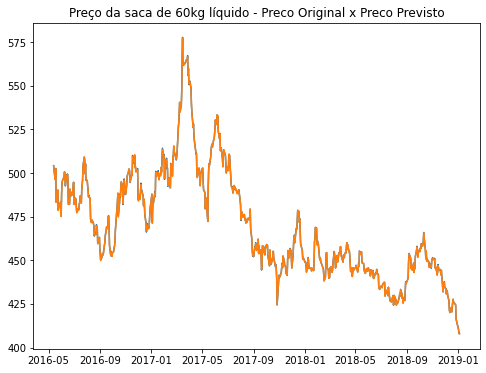

In [82]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV5_avalia_treino['Preco_Original'])
plt.plot(modeloV5_avalia_treino['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

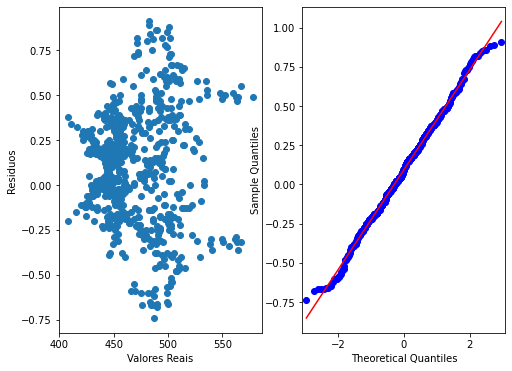

In [83]:
residuosV5_treino = PlotResiduos(modeloV5_avalia_treino)
residuosV5_treino.plot_residuos()

#### Avaliando em teste

In [97]:
modelo_v5.maparams

array([0.9892662])

In [98]:
modelo_v5.arparams

array([-0.99572511])

In [84]:
modeloV5_ARMA_teste = teste_diferenciado[['preco_reais']]
modeloV5_ARMA_teste.columns = ['Observado']

coef_l1 = modelo_v5.arparams.item()
hist = [modeloV5_ARMA_treino.iloc[i, 0] for i in range(len(modeloV5_ARMA_treino))]
lista_previsao = []

for t in range(len(modeloV5_ARMA_teste)):
    yhat = (hist[-1] * coef_l1)
    obs = modeloV5_ARMA_teste.iloc[t, 0]
    lista_previsao.append(yhat)
    hist.append(obs)

modeloV5_ARMA_teste['Previsto'] = lista_previsao

In [85]:
modeloV5_avalia_teste = retomando_valor_previsto(teste['preco_reais'], modeloV5_ARMA_teste['Previsto'])

avaliacao_teste['ModeloV5_ARMA11'] = AvaliandoModelos(modeloV5_avalia_teste['Preco_Original'],
                                                      modeloV5_avalia_teste['Preco_Previsto'])

In [86]:
avaliacao_teste

,ModeloV1_Shift,ModeloV2_MM_5Dias,ModeloV3_MME,ModeloV4_AR1,ModeloV5_ARMA11
Teste,,,,,
MSE,31.433443,7.453015,10.968012,0.003577,31.165345
RMSE,5.606554,2.730021,3.311799,0.059807,5.582593
MAE,3.940769,1.995142,2.430040,0.041984,3.924211
MAPE,0.901161,0.451930,0.553935,0.009599,0.897380


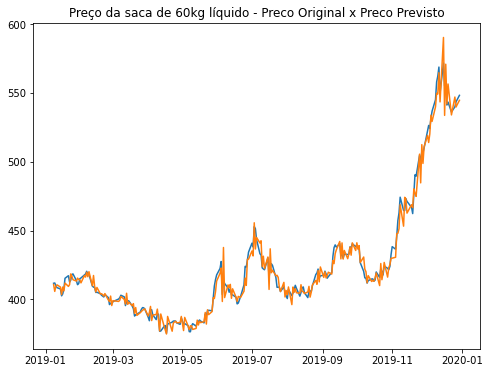

In [87]:
plt.figure(figsize = (8, 6))
plt.plot(modeloV5_avalia_teste['Preco_Original'])
plt.plot(modeloV5_avalia_teste['Preco_Previsto'])
plt.title('Preço da saca de 60kg líquido - Preco Original x Preco Previsto')
plt.ylabel('')
plt.show();

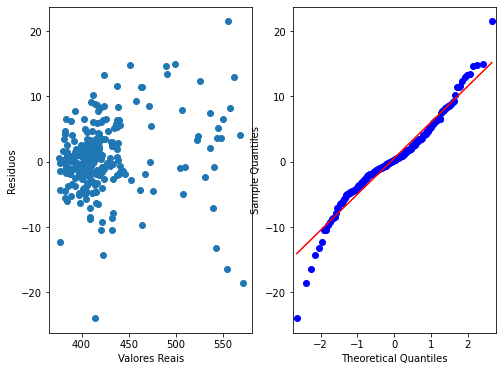

In [88]:
residuosV5_teste = PlotResiduos(modeloV5_avalia_teste)
residuosV5_teste.plot_residuos()